# Sales Forecast

In [1]:
## module for importing other .ipynb files from current working directory
## https://stackoverflow.com/questions/20186344/importing-an-ipynb-file-from-another-ipynb-file
import import_ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
import re

##ignore warnings
import warnings
warnings.filterwarnings("ignore")

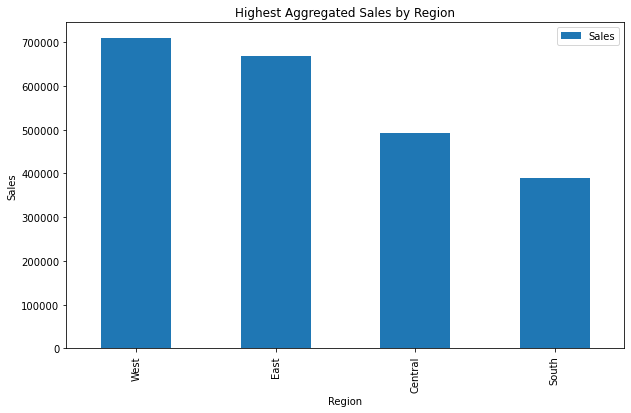

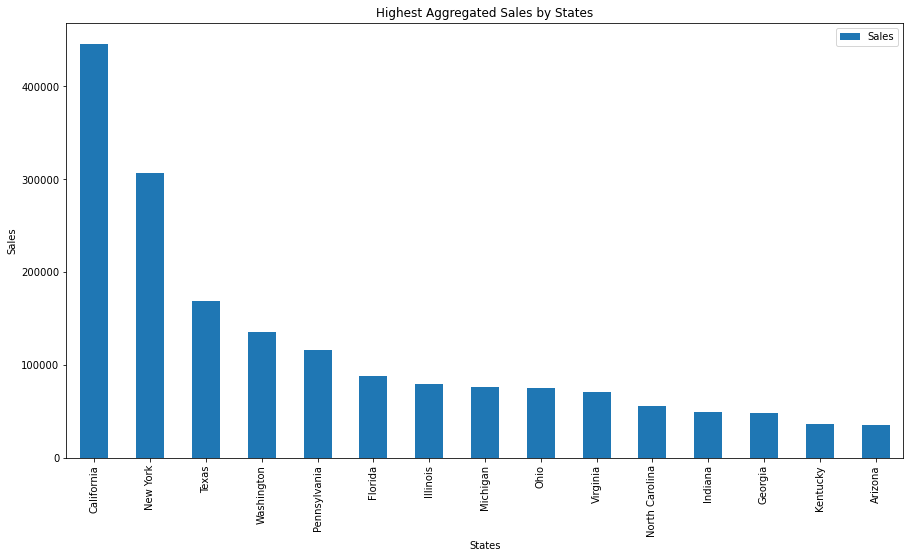

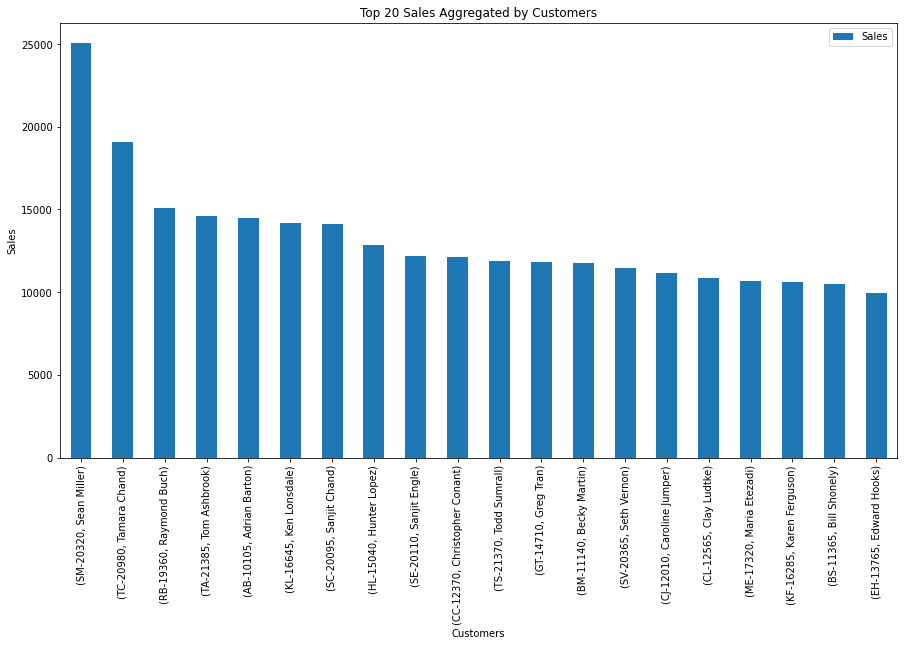

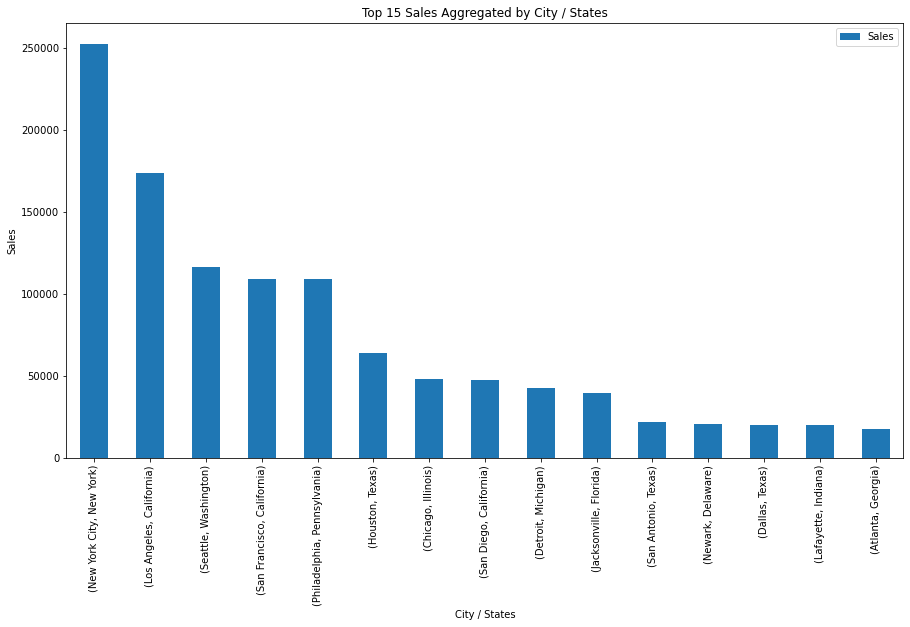

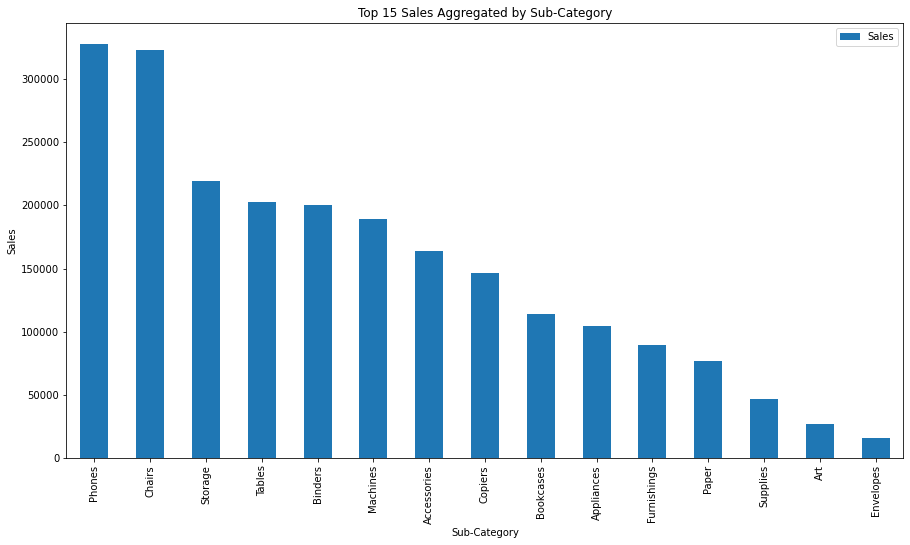

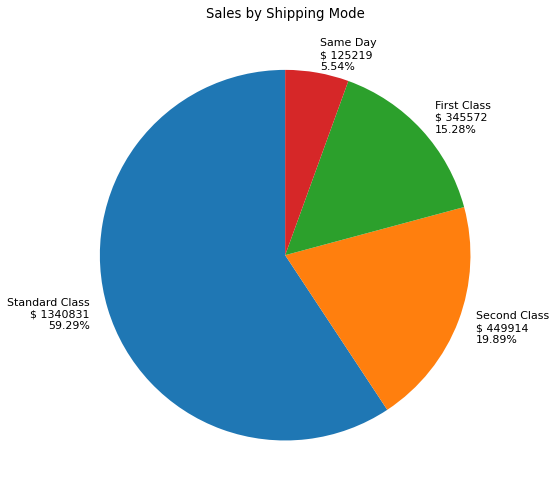

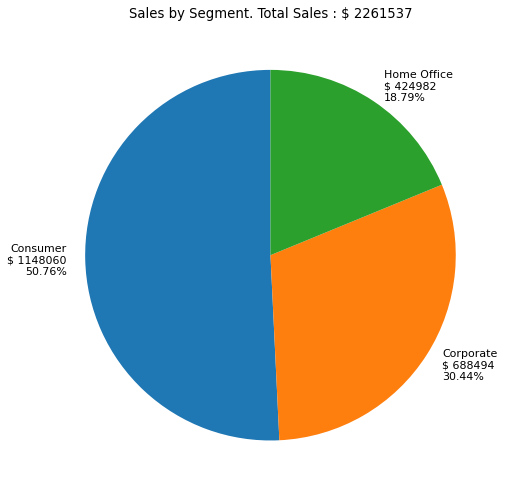

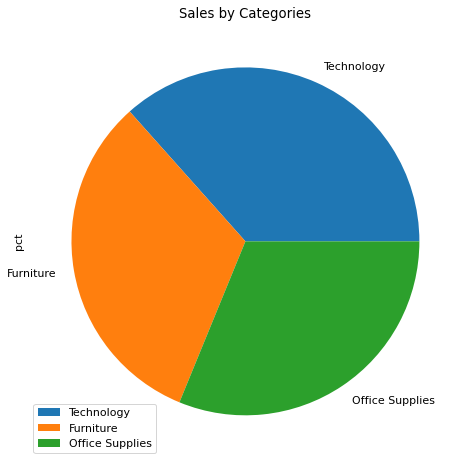

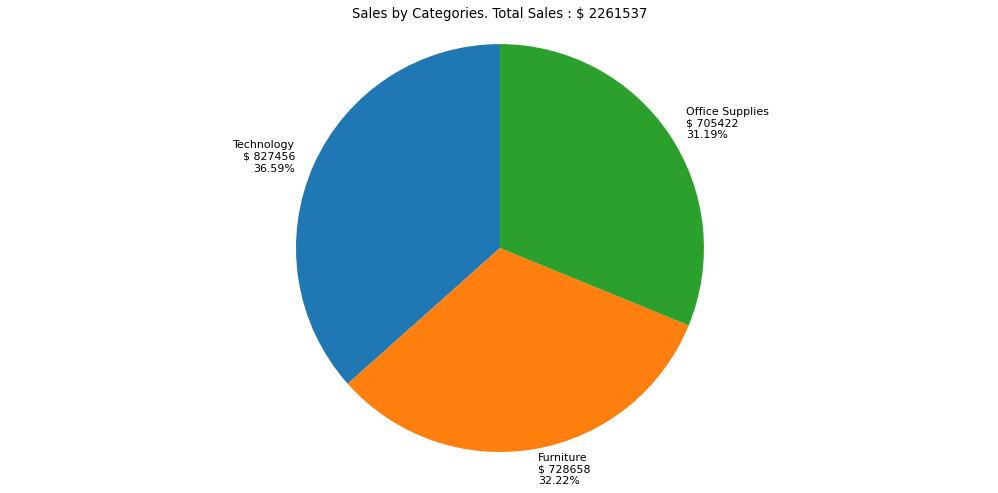

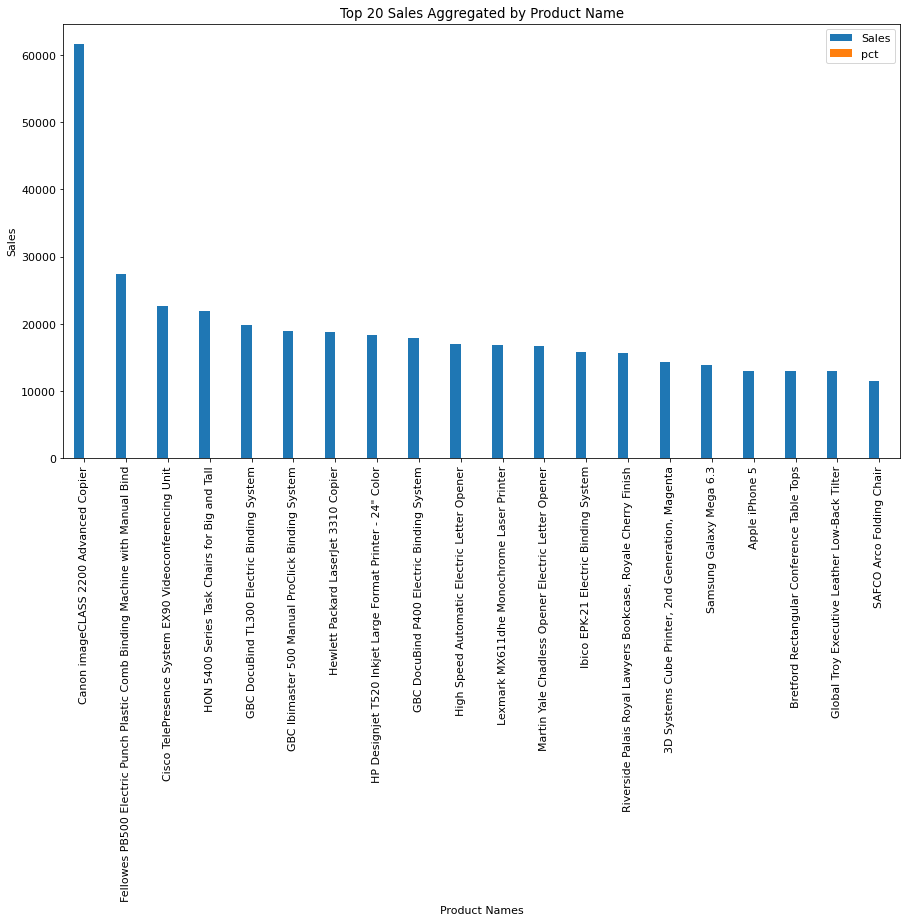

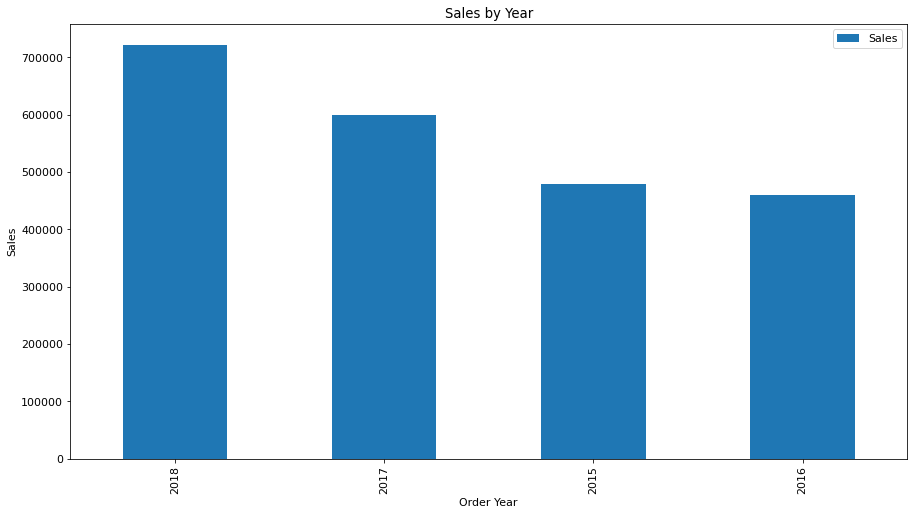

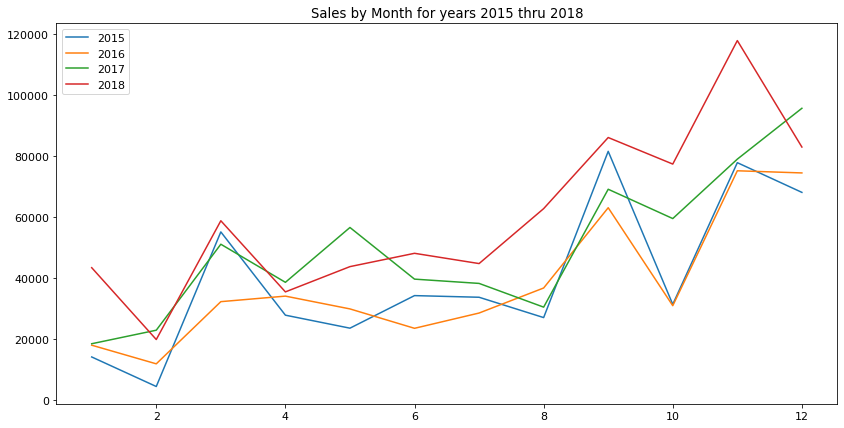

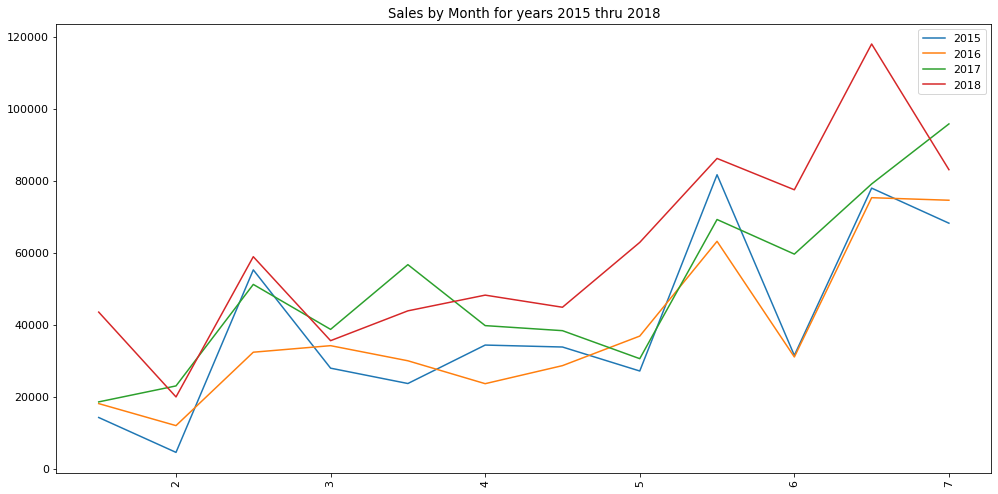

In [2]:
from ipynb.fs.full.Sales_Forecast_Data_Prep_EDA import *

In [3]:
## We will be using the already cleaned up and prepared dataframe train_df from the 'Sales_Forecast_Data_Prep_EDA.ipynb'
## Display initial few records from the previously cleaned and prepared training dataframe, to ensure it is correct 

train_df.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
7980  CA-2015-103800 2015-01-03 2015-01-07  Standard Class    DP-13000   
741   CA-2015-112326 2015-01-04 2015-01-08  Standard Class    PO-19195   
740   CA-2015-112326 2015-01-04 2015-01-08  Standard Class    PO-19195   
739   CA-2015-112326 2015-01-04 2015-01-08  Standard Class    PO-19195   
1759  CA-2015-141817 2015-01-05 2015-01-12  Standard Class    MB-18085   

      Customer Name      Segment        Country          City         State  \
7980  Darren Powers     Consumer  United States       Houston         Texas   
741   Phillina Ober  Home Office  United States    Naperville      Illinois   
740   Phillina Ober  Home Office  United States    Naperville      Illinois   
739   Phillina Ober  Home Office  United States    Naperville      Illinois   
1759     Mick Brown     Consumer  United States  Philadelphia  Pennsylvania   

      Postal Code   Region       Product ID         Category Sub-Category  \
7980      77095.0  Central  OFF-PA-10000174  Office Supplies        Paper   
741       60540.0  Central  OFF-BI-10004094  Office Supplies      Binders   
740       60540.0  Central  OFF-ST-10002743  Office Supplies      Storage   
739       60540.0  Central  OFF-LA-10003223  Office Supplies       Labels   
1759      19143.0     East  OFF-AR-10003478  Office Supplies          Art   

                                           Product Name   Sales  Order_Year  \
7980  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.45        2015   
741          GBC Standard Plastic Binding Systems Combs    3.54        2015   
740                       SAFCO Boltless Steel Shelving  272.74        2015   
739                                           Avery 508   11.78        2015   
1759  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.54        2015   

      Order_Month  
7980            1  
741             1  
740             1  
739             1  
1759            1

In [4]:
## define new dataframe with only 'Order Date' and 'Sales' columns. This will be useful for next steps in Sales predictions

temp_pred_df = train_df[['Order Date', 'Sales']]
temp_pred_df.sort_values(['Order Date'], inplace = True, ascending=True)
temp_pred_df.head()

Order Date   Sales
7980 2015-01-03   16.45
741  2015-01-04    3.54
740  2015-01-04  272.74
739  2015-01-04   11.78
1759 2015-01-05   19.54

In [5]:
## we will aggregate the Sales by using groupby on 'Order Date'.
## this will also set the 'Order Date' column as index

group_df = pd.DataFrame(temp_pred_df.groupby(['Order Date']).sum())
group_df

Sales
Order Date         
2015-01-03    16.45
2015-01-04   288.06
2015-01-05    19.54
2015-01-06  4407.10
2015-01-07    87.16
...             ...
2018-12-26   814.59
2018-12-27   177.64
2018-12-28  1657.34
2018-12-29  2915.54
2018-12-30   713.79

[1230 rows x 1 columns]

In [6]:
## data for initial part of the year 2015
df15 = group_df[ : '2015-01-31']
df15

Sales
Order Date         
2015-01-03    16.45
2015-01-04   288.06
2015-01-05    19.54
2015-01-06  4407.10
2015-01-07    87.16
2015-01-09    40.54
2015-01-10    54.83
2015-01-11     9.94
2015-01-13  3553.80
2015-01-14    61.96
2015-01-15   149.95
2015-01-16   299.96
2015-01-18    64.86
2015-01-19   378.59
2015-01-20  2673.87
2015-01-23    40.08
2015-01-26  1097.25
2015-01-27   426.67
2015-01-28     3.93
2015-01-30   240.50
2015-01-31   290.67

In [7]:
## data for end of 2015 and initial part of the year 2016
df15_16 = group_df['2015-12-20': '2016-01-15']
df15_16

Sales
Order Date         
2015-12-20  6962.44
2015-12-21  1933.44
2015-12-22   798.96
2015-12-23   942.10
2015-12-24  1950.21
2015-12-26  2041.42
2015-12-27  2966.38
2015-12-28  2682.33
2015-12-29  2072.11
2015-12-30  2172.64
2015-12-31  5253.27
2016-01-02  1932.09
2016-01-03  1768.23
2016-01-04   264.46
2016-01-05   295.27
2016-01-06    31.54
2016-01-09   364.07
2016-01-10  1018.10
2016-01-12   747.50
2016-01-13   622.28

In [8]:
## data for end of 2016 and initial part of the year 2017
df16_17 = group_df['2016-12-20': '2017-01-15']
df16_17

Sales
Order Date         
2016-12-20  1107.47
2016-12-21  3257.76
2016-12-22   473.31
2016-12-23   194.32
2016-12-24  7484.56
2016-12-25  4204.98
2016-12-26   561.49
2016-12-27  5148.44
2016-12-28    79.20
2016-12-30  3251.34
2016-12-31  1381.35
2017-01-02   405.92
2017-01-03  2095.83
2017-01-04  1069.22
2017-01-05   255.90
2017-01-07    83.58
2017-01-08  1859.16
2017-01-09   743.05
2017-01-10   174.75
2017-01-11   149.44
2017-01-14   405.35
2017-01-15   701.93

In [9]:
## data for end of 2017 and initial part of the year 2018
df17_18 = group_df['2017-12-20': '2018-01-15']
df17_18

Sales
Order Date          
2017-12-20    134.54
2017-12-22   1043.12
2017-12-23   6965.86
2017-12-24   1938.26
2017-12-25  10488.06
2017-12-26   1829.41
2017-12-27    959.49
2017-12-29   1277.68
2017-12-30    773.76
2017-12-31    731.78
2018-01-01   1481.83
2018-01-02   2079.54
2018-01-03   2070.27
2018-01-06     33.74
2018-01-07   3395.59
2018-01-08    892.98
2018-01-09    274.49
2018-01-12    848.52
2018-01-13   4619.33
2018-01-14    697.33
2018-01-15   2140.27

In [10]:
## data for end of 2018
df18 = group_df['2018-12-10': ]
df18

Sales
Order Date         
2018-12-10  3873.56
2018-12-11  2025.03
2018-12-13   580.94
2018-12-14  3897.71
2018-12-15   306.89
2018-12-16   858.70
2018-12-17  2027.76
2018-12-18  3645.90
2018-12-19  1895.93
2018-12-20   377.73
2018-12-21  2140.94
2018-12-22  7442.02
2018-12-23  1926.76
2018-12-24  6233.05
2018-12-25  2698.92
2018-12-26   814.59
2018-12-27   177.64
2018-12-28  1657.34
2018-12-29  2915.54
2018-12-30   713.79

In [11]:
pred_df = group_df.reset_index()

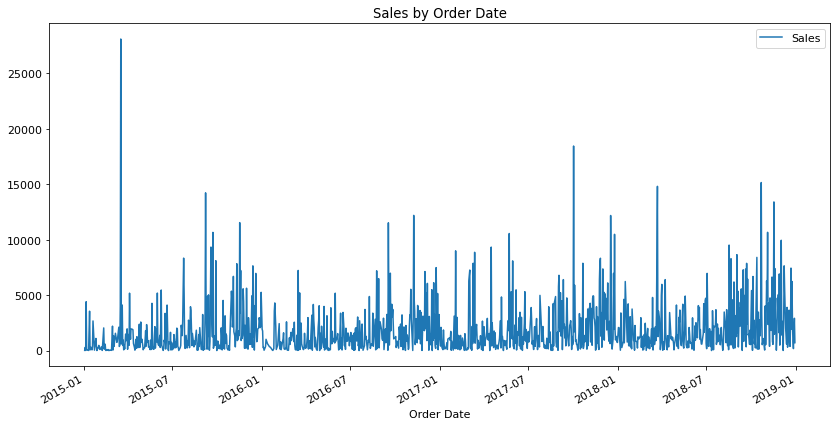

In [12]:
## using pandas plot feature to display the Sales data by Order Date for the entire dataset

group_df.plot()
plt.title('Sales by Order Date')
plt.show()

### Commented section - as a backup example / methods

In [13]:
#### prepare separate dataframes by each year Sales data
#df_2015 = pred_df[(pred_df['Order Date'] >= '2015-01-01') & (pred_df['Order Date'] <= '2015-12-31')]
#df_2016 = pred_df[(pred_df['Order Date'] >= '2016-01-01') & (pred_df['Order Date'] <= '2016-12-31')]
#df_2017 = pred_df[(pred_df['Order Date'] >= '2017-01-01') & (pred_df['Order Date'] <= '2017-12-31')]
#df_2018 = pred_df[(pred_df['Order Date'] >= '2018-01-01') & (pred_df['Order Date'] <= '2018-12-31')]

In [14]:
## plot 2015 Sales data

#plt.plot(df_2015['Order Date'], df_2015['Sales'])
#plt.show()

In [15]:
## plot 2016 Sales data

#plt.plot(df_2016['Order Date'], df_2016['Sales'])
#plt.show()

In [16]:
## plot 2017 Sales data

#plt.plot(df_2017['Order Date'], df_2017['Sales'])
#plt.show()

In [17]:
## plot 2018 Sales data

#plt.plot(df_2018['Order Date'], df_2018['Sales'])
#plt.show()

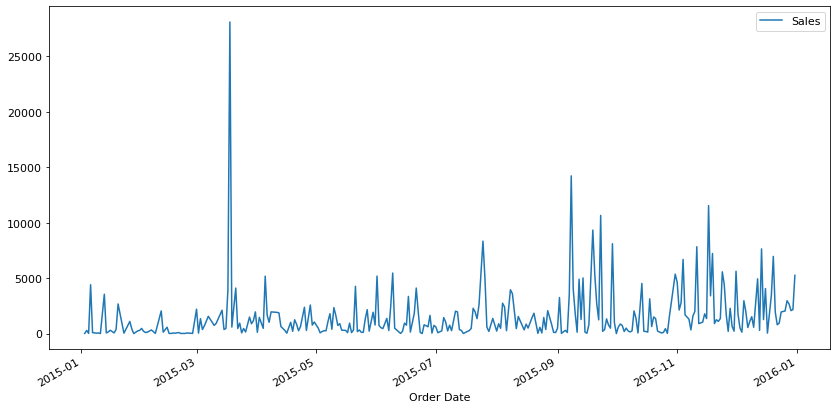

In [18]:
## plot 2015 Sales data

#group_df['2015'].plot()             ### subset the sales data using the year 2015 from time index

### another method to slice the sales data using the year 2015 from time index
group_df[datetime(2015, 1, 1):datetime(2015, 12, 31)].plot()

plt.show()

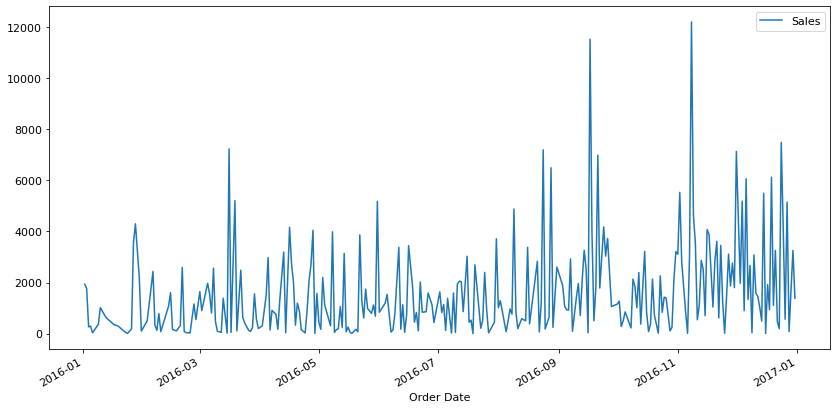

In [19]:
## plot 2016 Sales data

#group_df['2016'].plot()             ### subset the sales data using the year 2016 from time index

### another method to slice the sales data using the year 2016 from time index
group_df[datetime(2016, 1, 1):datetime(2016, 12, 31)].plot()

plt.show()

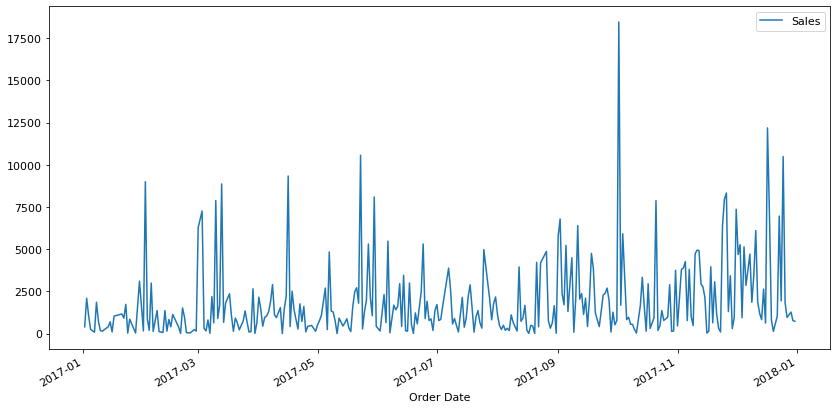

In [20]:
## plot 2017 Sales data

#group_df['2017'].plot()             ### subset the sales data using the year 2017 from time index

### another method to slice the sales data using the year 2017 from time index
group_df[datetime(2017, 1, 1):datetime(2017, 12, 31)].plot()

plt.show()

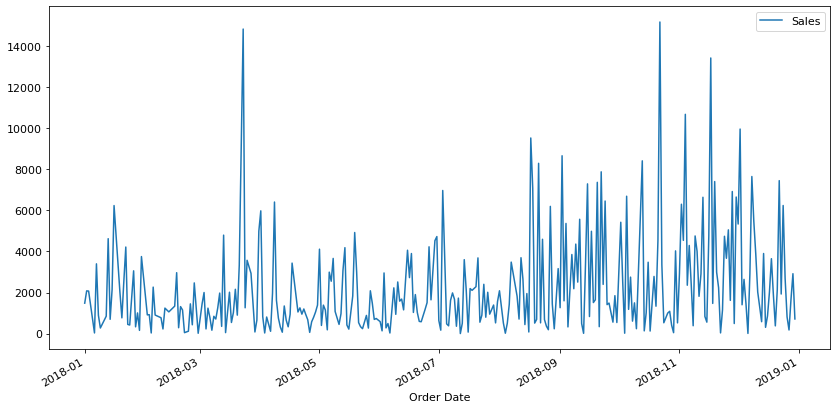

In [21]:
## plot 2018 Sales data

#group_df['2018'].plot()             ### subset the sales data using the year 2018 from time index

### another method to slice the sales data using the year 2018 from time index
group_df[datetime(2018, 1, 1):datetime(2018, 12, 31)].plot()

plt.show()

## ========================================================================

We will need to perform the test to understand whether the Sales distribution time series is Stationary or not.
If the mean and variance of a series do not vary much over a period of time, the series is said to be Stationary.

## we will use newly defined stat_df - for stationary tests
stat_df = group_df

## `resample` is a flexible and high-performance method. It can be used to process large time series data.
## resampled the data using 'Daily' frequency 'D' & we will find mean `Python for Data Analysis - Wes McKinney (11.3, 11.6)`

stat_df = pd.DataFrame(stat_df['Sales'].resample('D').mean())

## we will use linear method to interpolate any missing sales data at the Daily level
stat_df = stat_df.interpolate(method='linear')

## train / validate / test dataframe prepared with random shuffling of the original Sales data
len_stat = len(stat_df)

ttv_df = stat_df.sample(len_stat)

train = stat_df[:int(0.6*len_stat)]
validate = stat_df[int(0.6*len_stat):int(0.8*len_stat)]
test = stat_df[int(0.8*len_stat):]

train.describe()

validate.describe()

test.describe()

## ========================================================================

## Using FB Prophet for Sales predictions

#### https://xang1234.github.io/prophet/
#### https://www.kaggle.com/prashant111/tutorial-time-series-forecasting-with-prophet
#### https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
#### https://stackoverflow.com/questions/68142645/disable-info-fbprophet-disabling-daily-seasonality-from-printing

In [22]:
## creating new dataframe for FB Prophet and Neural Prophet predictions.
## We will use this new dataframe for manipulations of column names as required by FB Prophet and Neural Phophet
## 'Date / Time column' has to be named as 'ds' as default and 'Sales' column needs to be renamed to 'y'

daily_df = pred_df

daily_df.rename(columns={'Order Date' : 'ds', 'Sales' : 'y'}, inplace=True)

daily_df.head()

ds        y
0 2015-01-03    16.45
1 2015-01-04   288.06
2 2015-01-05    19.54
3 2015-01-06  4407.10
4 2015-01-07    87.16

In [23]:
daily_df.tail(10)

ds        y
1220 2018-12-21  2140.94
1221 2018-12-22  7442.02
1222 2018-12-23  1926.76
1223 2018-12-24  6233.05
1224 2018-12-25  2698.92
1225 2018-12-26   814.59
1226 2018-12-27   177.64
1227 2018-12-28  1657.34
1228 2018-12-29  2915.54
1229 2018-12-30   713.79

In [24]:
from fbprophet import Prophet

import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

#from prophet import Prophet 

### Training

In [25]:
m = Prophet(daily_seasonality=True)
m.fit(daily_df)

### Predictions

In [26]:
future = m.make_future_dataframe(periods=15)
forecast = m.predict(future)

In [27]:
future

ds
0    2015-01-03
1    2015-01-04
2    2015-01-05
3    2015-01-06
4    2015-01-07
...         ...
1240 2019-01-10
1241 2019-01-11
1242 2019-01-12
1243 2019-01-13
1244 2019-01-14

[1245 rows x 1 columns]

In [28]:
forecast[-15:]

ds        trend   yhat_lower   yhat_upper  trend_lower  \
1230 2018-12-31  1166.064301  -422.165667  5051.212357  1166.064301   
1231 2019-01-01  1166.993740   -65.180217  5328.715468  1166.993740   
1232 2019-01-02  1167.923180  -516.428859  5004.014756  1167.923180   
1233 2019-01-03  1168.852619 -1330.694477  4189.839861  1168.852619   
1234 2019-01-04  1169.782059  -963.045745  4774.714737  1169.782059   
1235 2019-01-05  1170.711498  -553.379519  4911.145370  1170.711498   
1236 2019-01-06  1171.640938  -900.965181  4400.879119  1171.640938   
1237 2019-01-07  1172.570377 -1052.319312  4524.310423  1172.570377   
1238 2019-01-08  1173.499817  -732.485396  4672.260448  1173.499817   
1239 2019-01-09  1174.429256 -1238.898571  4214.816096  1174.429256   
1240 2019-01-10  1175.358695 -1826.819376  3399.712904  1175.358695   
1241 2019-01-11  1176.288135 -1228.440528  4024.009724  1176.288135   
1242 2019-01-12  1177.217574  -988.122729  4311.483386  1177.217465   
1243 2019-01-13  1178.147014 -1161.201038  4350.277257  1178.136938   
1244 2019-01-14  1179.076453 -1256.695030  3890.814913  1179.056766   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1230  1166.064301     1148.495864           1148.495864           1148.495864   
1231  1166.993740     1393.003045           1393.003045           1393.003045   
1232  1167.923180      818.812707            818.812707            818.812707   
1233  1168.852619      141.307600            141.307600            141.307600   
1234  1169.782059      661.805022            661.805022            661.805022   
1235  1170.711498     1008.358531           1008.358531           1008.358531   
1236  1171.640938      687.244242            687.244242            687.244242   
1237  1172.570377      502.667084            502.667084            502.667084   
1238  1173.499817      788.878138            788.878138            788.878138   
1239  1174.429256      264.350511            264.350511            264.350511   
1240  1175.362485     -356.497008           -356.497008           -356.497008   
1241  1176.295793      226.520489            226.520489            226.520489   
1242  1177.231244      640.180642            640.180642            640.180642   
1243  1178.171403      389.368771            389.368771            389.368771   
1244  1179.114157      276.815904            276.815904            276.815904   

            daily  ...      weekly  weekly_lower  weekly_upper      yearly  \
1230  1112.399259  ...   12.979075     12.979075     12.979075   23.117531   
1231  1112.399259  ...  362.735220    362.735220    362.735220  -82.131434   
1232  1112.399259  ... -108.245418   -108.245418   -108.245418 -185.341134   
1233  1112.399259  ... -686.025388   -686.025388   -686.025388 -285.066270   
1234  1112.399259  ...  -70.680450    -70.680450    -70.680450 -379.913787   
1235  1112.399259  ...  364.534496    364.534496    364.534496 -468.575223   
1236  1112.399259  ...  124.702465    124.702465    124.702465 -549.857482   
1237  1112.399259  ...   12.979075     12.979075     12.979075 -622.711249   
1238  1112.399259  ...  362.735220    362.735220    362.735220 -686.256341   
1239  1112.399259  ... -108.245418   -108.245418   -108.245418 -739.803330   
1240  1112.399259  ... -686.025388   -686.025388   -686.025388 -782.870879   
1241  1112.399259  ...  -70.680450    -70.680450    -70.680450 -815.198319   
1242  1112.399259  ...  364.534496    364.534496    364.534496 -836.753112   
1243  1112.399259  ...  124.702465    124.702465    124.702465 -847.732953   
1244  1112.399259  ...   12.979075     12.979075     12.979075 -848.562429   

      yearly_lower  yearly_upper  multiplicative_terms  \
1230     23.117531     23.117531                   0.0   
1231    -82.131434    -82.131434                   0.0   
1232   -185.341134   -185.341134                   0.0   
1233   -285.066270   -285.066270                   0.0   
1234   -379.913787   -379.913787        

### Check results

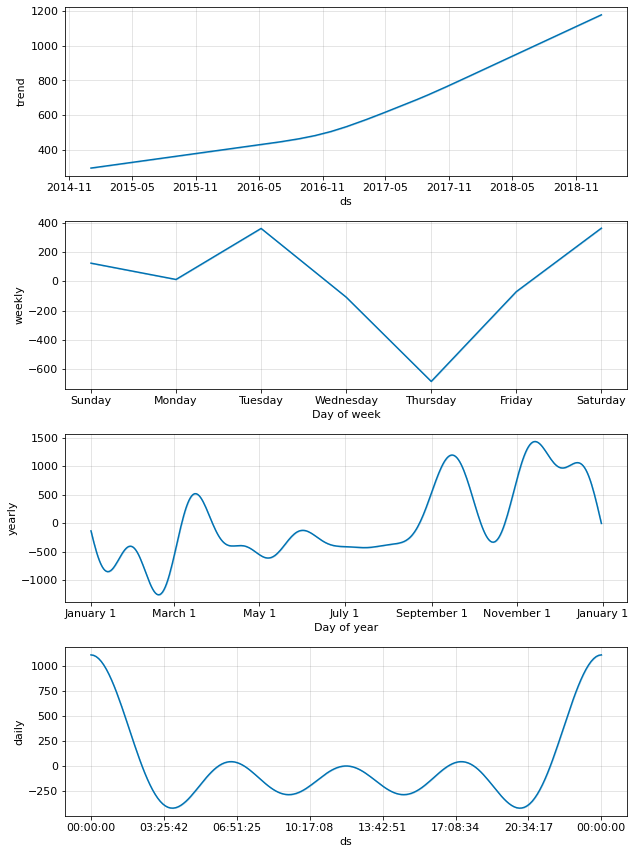

In [29]:
fig2 = m.plot_components(forecast)

#pip install plotly

In [30]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [31]:
plot_plotly(m, forecast)

In [32]:
plot_components_plotly(m, forecast)

In [33]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='730 days', period='90 days', horizon='515 days')

  0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
df_cv.sort_values(['ds'])
df_cv.tail()

ds         yhat  yhat_lower   yhat_upper        y     cutoff
1356 2018-12-26  3422.116311  922.203241  6027.604762   814.59 2017-08-02
1357 2018-12-27  2667.105569   42.304205  5221.609811   177.64 2017-08-02
1358 2018-12-28  2311.165026 -220.585737  4850.269875  1657.34 2017-08-02
1359 2018-12-29  2888.188908  345.074787  5364.341977  2915.54 2017-08-02
1360 2018-12-30  2641.933011  -83.551340  5249.144038   713.79 2017-08-02

In [35]:
from fbprophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.tail()

horizon           mse         rmse          mae      mape     mdape  \
458 511 days  6.879071e+06  2622.798236  1987.559586  5.580470  0.671296   
459 512 days  6.956558e+06  2637.528676  2011.011200  5.640538  0.687591   
460 513 days  6.903811e+06  2627.510453  1987.757728  5.631451  0.671296   
461 514 days  6.792085e+06  2606.162840  1960.255295  5.661361  0.674211   
462 515 days  7.019155e+06  2649.368852  1993.529684  5.664362  0.674211   

     coverage  
458  0.742647  
459  0.742647  
460  0.742647  
461  0.750000  
462  0.742647

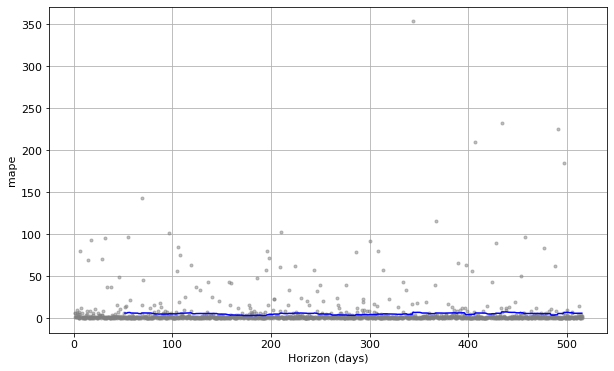

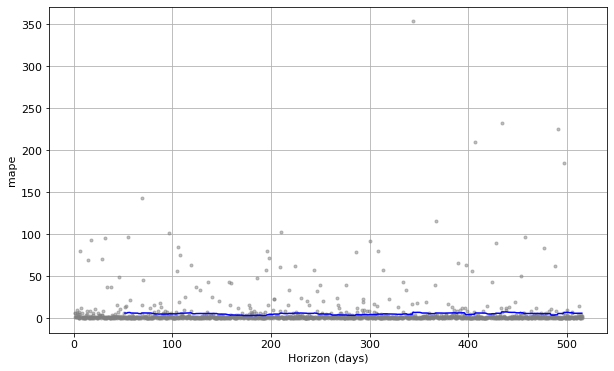

In [36]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape')

## =========================================================================

## Using Neural Prophet for predictions

In [37]:
from neuralprophet import NeuralProphet

In [38]:
daily_NP = NeuralProphet()
metrics = daily_NP.fit(daily_df, freq="D")
forecast = daily_NP.predict(daily_df)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 171
INFO:NP.config:Auto-set epochs to 171


  0%|          | 0/254 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.54E-02, min: 7.34E-01
INFO:NP.utils_torch:lr-range-test results: steep: 3.54E-02, min: 7.34E-01


  0%|          | 0/254 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.53E-02, min: 6.76E-01
INFO:NP.utils_torch:lr-range-test results: steep: 4.53E-02, min: 6.76E-01


  0%|          | 0/254 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.17E-02, min: 8.64E-01
INFO:NP.utils_torch:lr-range-test results: steep: 4.17E-02, min: 8.64E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.06E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 4.06E-02
Epoch[171/171]: 100%|██████████| 171/171 [00:13<00:00, 13.15it/s, SmoothL1Loss=0.0499, MAE=1.39e+3, RMSE=2.02e+3, RegLoss=0]


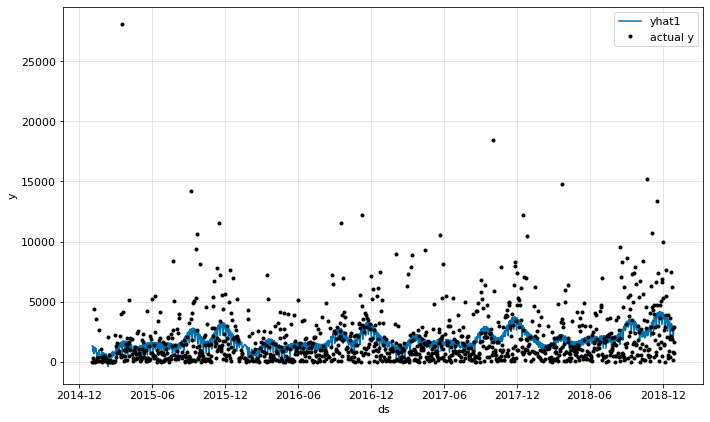

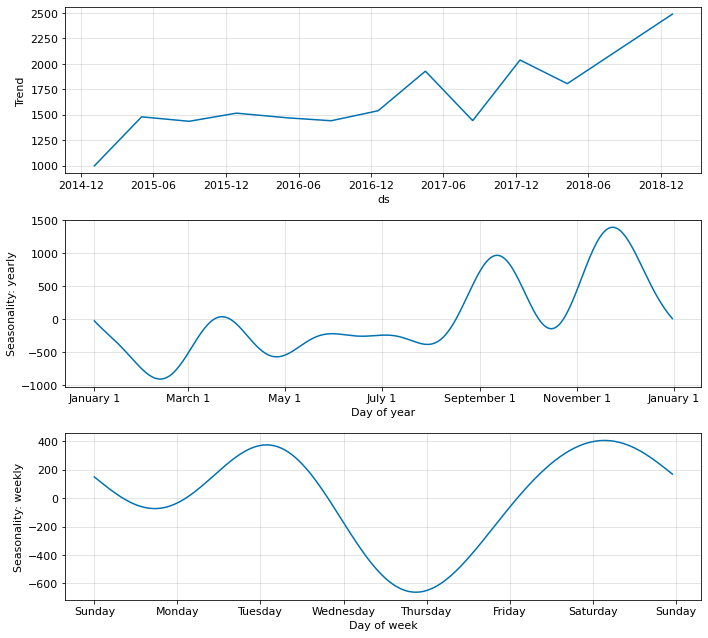

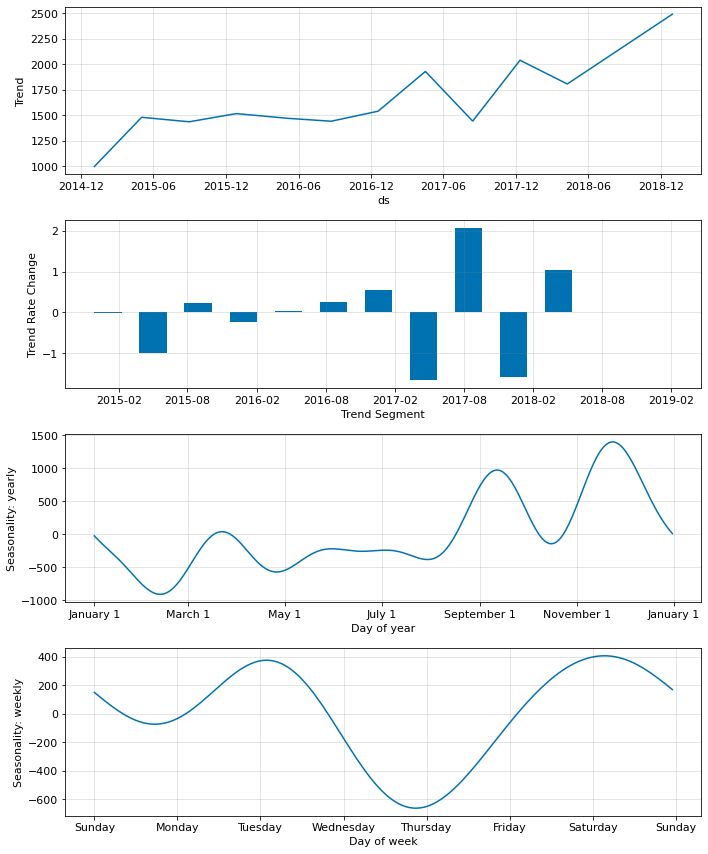

In [39]:
fig_forecast = daily_NP.plot(forecast)
fig_components = daily_NP.plot_components(forecast)
fig_model = daily_NP.plot_parameters()

### Predictions with Neural Prophet

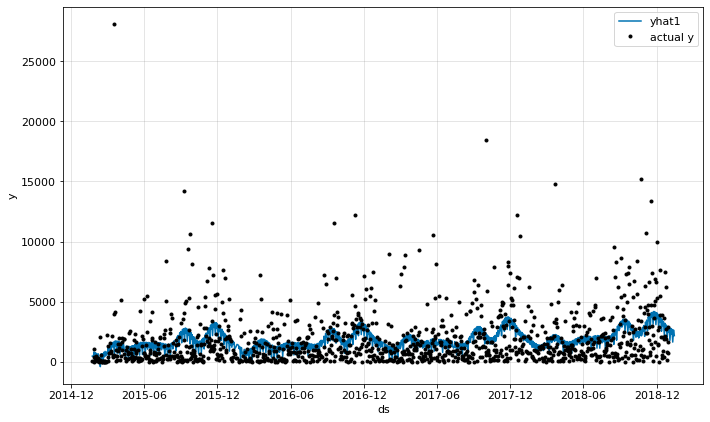

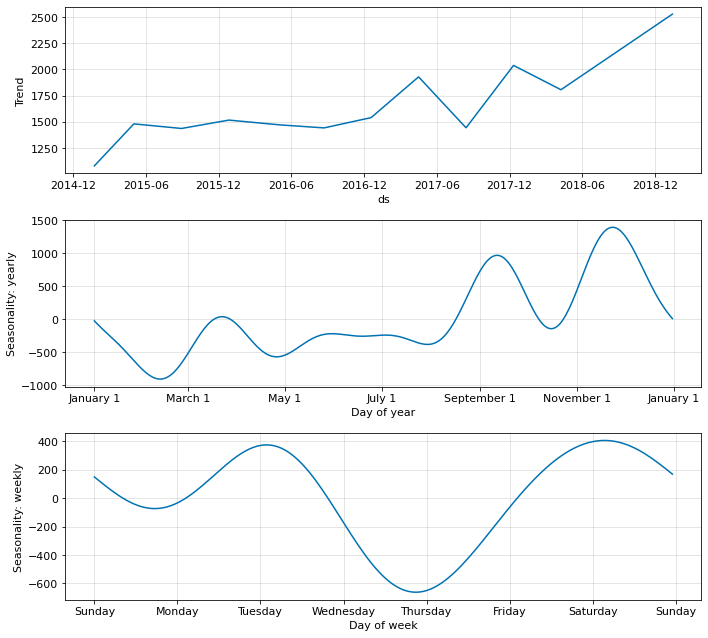

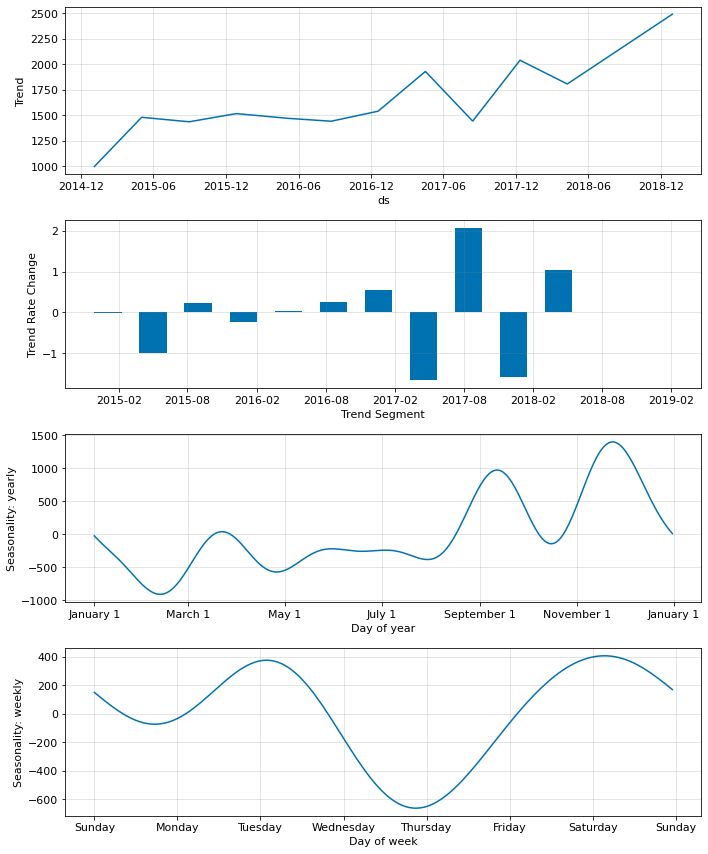

In [40]:
future = daily_NP.make_future_dataframe(daily_df, periods=15, n_historic_predictions=len(daily_df)-15)
forecast = daily_NP.predict(future)
fig_forecast = daily_NP.plot(forecast)
fig_components = daily_NP.plot_components(forecast)
fig_model = daily_NP.plot_parameters()

In [41]:
future

ds        y
0    2015-01-23    40.08
1    2015-01-26  1097.25
2    2015-01-27   426.67
3    2015-01-28     3.93
4    2015-01-30   240.50
...         ...      ...
1225 2019-01-10      NaN
1226 2019-01-11      NaN
1227 2019-01-12      NaN
1228 2019-01-13      NaN
1229 2019-01-14      NaN

[1230 rows x 2 columns]

In [42]:
forecast

ds        y        yhat1   residual1        trend  season_yearly  \
0    2015-01-23    40.08   475.833923  435.753923  1079.215942    -539.991882   
1    2015-01-26  1097.25   437.919861 -659.330139  1091.335938    -620.078796   
2    2015-01-27   426.67   820.685303  394.015303  1095.375977    -646.589478   
3    2015-01-28     3.93   254.154343  250.224343  1099.415894    -672.772034   
4    2015-01-30   240.50   320.592743   80.092743  1107.495850    -723.512878   
...         ...      ...          ...         ...          ...            ...   
1225 2019-01-10      NaN  1639.800537         NaN  2516.615723    -225.793457   
1226 2019-01-11      NaN  2207.844238         NaN  2519.192139    -247.957855   
1227 2019-01-12      NaN  2650.196045         NaN  2521.768555    -270.254181   
1228 2019-01-13      NaN  2381.227783         NaN  2524.345215    -292.775421   
1229 2019-01-14      NaN  2177.983154         NaN  2526.921875    -315.601501   

      season_weekly  
0        -63.390114  
1        -33.337261  
2        371.898895  
3       -172.489502  
4        -63.390114  
...             ...  
1225    -651.021790  
1226     -63.390114  
1227     398.681610  
1228     149.658173  
1229     -33.337261  

[1230 rows x 7 columns]

In [43]:
forecast.tail(15)

ds   y        yhat1  residual1        trend  season_yearly  \
1215 2018-12-31 NaN  2472.544678        NaN  2490.850586      15.031427   
1216 2019-01-01 NaN  2852.757080        NaN  2493.427002     -12.568791   
1217 2019-01-02 NaN  2284.468506        NaN  2496.003418     -39.045494   
1218 2019-01-03 NaN  1783.039185        NaN  2498.580322     -64.519287   
1219 2019-01-04 NaN  2348.648438        NaN  2501.156494     -89.117867   
1220 2019-01-05 NaN  2789.441406        NaN  2503.733398    -112.973579   
1221 2019-01-06 NaN  2519.746826        NaN  2506.309814    -136.221268   
1222 2019-01-07 NaN  2316.552734        NaN  2508.886230    -158.996185   
1223 2019-01-08 NaN  2701.930176        NaN  2511.462646    -181.431503   
1224 2019-01-09 NaN  2137.893799        NaN  2514.039551    -203.656281   
1225 2019-01-10 NaN  1639.800537        NaN  2516.615723    -225.793457   
1226 2019-01-11 NaN  2207.844238        NaN  2519.192139    -247.957855   
1227 2019-01-12 NaN  2650.196045        NaN  2521.768555    -270.254181   
1228 2019-01-13 NaN  2381.227783        NaN  2524.345215    -292.775421   
1229 2019-01-14 NaN  2177.983154        NaN  2526.921875    -315.601501   

      season_weekly  
1215     -33.337261  
1216     371.898895  
1217    -172.489502  
1218    -651.021790  
1219     -63.390114  
1220     398.681610  
1221     149.658173  
1222     -33.337261  
1223     371.898895  
1224    -172.489502  
1225    -651.021790  
1226     -63.390114  
1227     398.681610  
1228     149.658173  
1229     -33.337261

## ========================================================================

## Building SARIMA models

### Testing the Stationarity of the Dataset - Augmented Dickey-Fuller Test
The ADF test is a type of unit root test. Unit roots are a cause for non-stationarity, the ADF test will test if the unit root is present. The Null Hypothesis states there is the presence of a unit root. If the P-Value is less than the Significance Level defined, we reject the Null Hypothesis that the time series contains a unit root. In other words, by rejecting the Null hypothesis, we can conclude that the time series is stationary.

https://medium.com/mlearning-ai/how-to-build-sarima-model-in-python-7ae83b14c884

In [44]:
from statsmodels.tsa.stattools import adfuller
import itertools

In [45]:
## we will use newly defined stat_df - for stationary tests
stat_df = group_df

## `resample` is a flexible and high-performance method. It can be used to process large time series data.
## resampled the data using 'Daily' frequency 'D' & we will find mean `Python for Data Analysis - Wes McKinney (11.3, 11.6)`

stat_df = pd.DataFrame(stat_df['Sales'].resample('D').mean())

## we will use linear method to interpolate any missing sales data at the Daily level
stat_df = stat_df.interpolate(method='linear')

<Figure size 2160x1080 with 0 Axes>

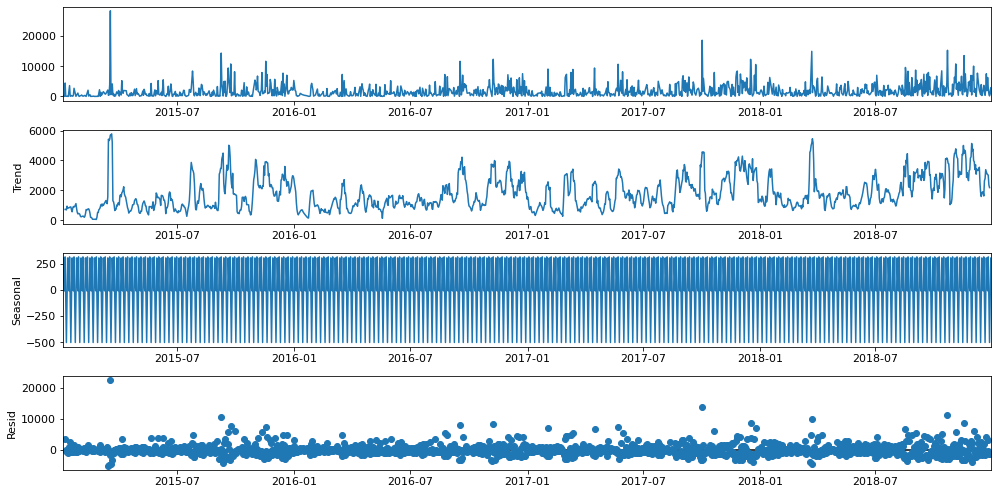

In [46]:
plt.figure(figsize=(30, 15))

import statsmodels.api as sm

#function used to decompose Time Series Data into Trend and Seasonality
decomposition = sm.tsa.seasonal_decompose(stat_df, model='additive')

fig = decomposition.plot()

plt.show();

In [47]:
# Augmented Dickey-Fuller test (ADF Test)

ad_fuller_result = adfuller(stat_df['Sales'])
print('adf results: ', ad_fuller_result, '\n')
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


adf results:  (-6.444493081294046, 1.5781789978043213e-08, 15, 1442, {'1%': -3.4348929812602784, '5%': -2.863546418485167, '10%': -2.5678382024888378}, 26015.358001313038) 

ADF Statistic: -6.444493081294046
p-value: 1.5781789978043213e-08


**Since the p-value is much lesser than 0.05 (very close to 0.0 in fact), we can conclude that this Sales data time series is Stationary series**

After determining that our time series is stationary, we can use the SARIMA model to predict future values. 
The model’s notation is SARIMA(p, d, q) (P, D, Q)lag. These three parameters account for seasonality, trend, and noise in data.

We will use the AIC (Akaike information criterion) indicator which is an estimator of the relative quality of statistical models. The lower the AIC value the better.

In [48]:
p = d = q = range(0, 2) 

pdq = list(itertools.product(p, d, q))

## for loop to create combinations of SARIMA seasonal parameters
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] 

print('pdq length: ' , len(pdq), '\n', pdq)

print('\nFew samples of Seasonal ARIMA parameter combinations:')
print('SARIMA: {} x {}'.format(pdq[0], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[3], seasonal_pdq_comb[4]))
print('SARIMA: {} x {}'.format(pdq[4], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[5], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[6], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[7], seasonal_pdq_comb[4]))
print('SARIMA: {} x {}'.format(pdq[7], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[6], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[5], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[4], seasonal_pdq_comb[4]))
print('SARIMA: {} x {}'.format(pdq[3], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[0], seasonal_pdq_comb[4]))

pdq length:  8 
 [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Few samples of Seasonal ARIMA parameter combinations:
SARIMA: (0, 0, 0) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 1) x (1, 0, 0, 12)
SARIMA: (1, 0, 0) x (0, 0, 1, 12)
SARIMA: (1, 0, 1) x (0, 1, 0, 12)
SARIMA: (1, 1, 0) x (0, 1, 1, 12)
SARIMA: (1, 1, 1) x (1, 0, 0, 12)
SARIMA: (1, 1, 1) x (0, 0, 1, 12)
SARIMA: (1, 1, 0) x (0, 1, 0, 12)
SARIMA: (1, 0, 1) x (0, 1, 1, 12)
SARIMA: (1, 0, 0) x (1, 0, 0, 12)
SARIMA: (0, 1, 1) x (0, 0, 1, 12)
SARIMA: (0, 1, 0) x (0, 1, 0, 12)
SARIMA: (0, 0, 1) x (0, 1, 1, 12)
SARIMA: (0, 0, 0) x (1, 0, 0, 12)


In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
#for loop to determine the best seasonal parameters combination for SARIMA, based on AIC value

for param in pdq:
    for seasonal_param in seasonal_pdq_comb:
        model = sm.tsa.statespace.SARIMAX(stat_df,
                                          order = param,
                                          seasonal_param_order = seasonal_param,
                                          enforce_stationarity = False,
                                          enforce_invertibility = False) ## the AIC value determination for the model
        results = model.fit()
        print(f'SARIMA {param} x {seasonal_param} combo has AIC value: {results.aic}')

SARIMA (0, 0, 0) x (0, 0, 0, 12) combo has AIC value: 27258.65512712966
SARIMA (0, 0, 0) x (0, 0, 1, 12) combo has AIC value: 27258.65512712966
SARIMA (0, 0, 0) x (0, 1, 0, 12) combo has AIC value: 27258.65512712966
SARIMA (0, 0, 0) x (0, 1, 1, 12) combo has AIC value: 27258.65512712966
SARIMA (0, 0, 0) x (1, 0, 0, 12) combo has AIC value: 27258.65512712966
SARIMA (0, 0, 0) x (1, 0, 1, 12) combo has AIC value: 27258.65512712966
SARIMA (0, 0, 0) x (1, 1, 0, 12) combo has AIC value: 27258.65512712966
SARIMA (0, 0, 0) x (1, 1, 1, 12) combo has AIC value: 27258.65512712966
SARIMA (0, 0, 1) x (0, 0, 0, 12) combo has AIC value: 26983.162525378873
SARIMA (0, 0, 1) x (0, 0, 1, 12) combo has AIC value: 26983.162525378873
SARIMA (0, 0, 1) x (0, 1, 0, 12) combo has AIC value: 26983.162525378873
SARIMA (0, 0, 1) x (0, 1, 1, 12) combo has AIC value: 26983.162525378873
SARIMA (0, 0, 1) x (1, 0, 0, 12) combo has AIC value: 26983.162525378873
SARIMA (0, 0, 1) x (1, 0, 1, 12) combo has AIC value: 26983

**Lowest AIC value is 26425.16312. So, we will use of the corresponding parameters and seasonal parameters combination**

In [51]:
## define and fit the model
model = sm.tsa.statespace.SARIMAX(stat_df,
                                order = (1, 1, 1),
                                seasonal_order = (1, 1, 1, 12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                 1458
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -13003.113
Date:                            Sun, 06 Feb 2022   AIC                          26016.226
Time:                                    18:01:51   BIC                          26042.557
Sample:                                01-03-2015   HQIC                         26026.058
                                     - 12-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1246      0.018      6.802      0.000       0.089       0.161
ma.L1         -0.9687      0.008   -124.838      0.000      -0.984      -0.953
ar.S.L12      -0.0374      0.029     -1.310      0.190      -0.093       0.019
ma.S.L12      -1.0019      0.012    -83.537      0.000      -1.025      -0.978
sigma2      4.458e+06   2.65e-09   1.68e+15      0.000    4.46e+06    4.46e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             29149.58
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             3.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.36e+29. Standard errors may be unstable.
"""

In [52]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1246      0.018      6.802      0.000       0.089       0.161
ma.L1         -0.9687      0.008   -124.838      0.000      -0.984      -0.953
ar.S.L12      -0.0374      0.029     -1.310      0.190      -0.093       0.019
ma.S.L12      -1.0019      0.012    -83.537      0.000      -1.025      -0.978
sigma2      4.458e+06   2.65e-09   1.68e+15      0.000    4.46e+06    4.46e+06


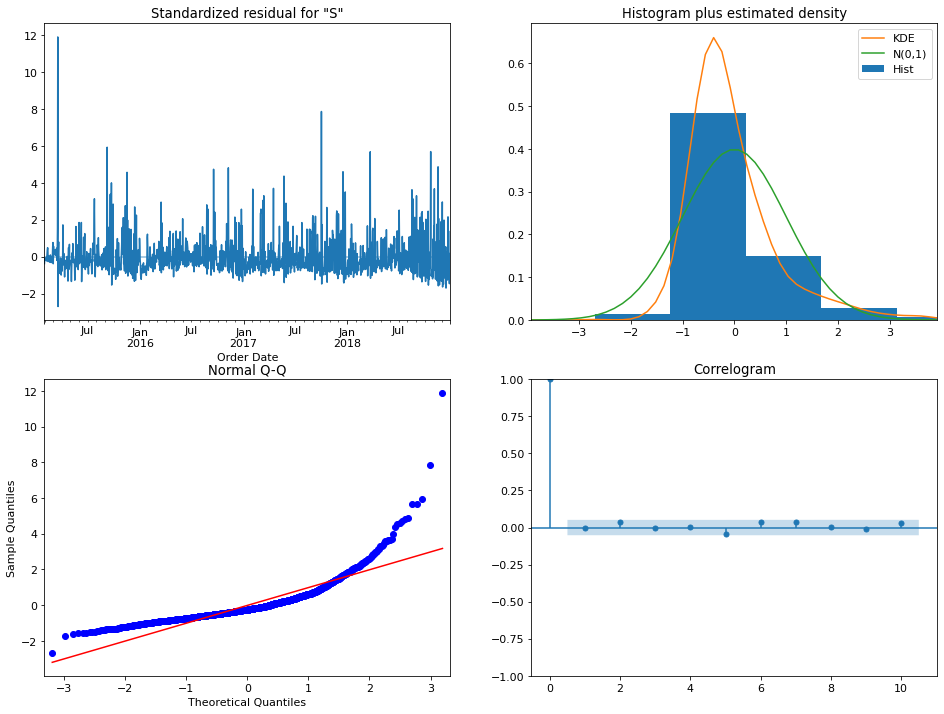

In [53]:
#Diagnosing the model residuals

results.plot_diagnostics(figsize=(16,12));

The correlogram on the bottom right suggests that there is no autocorrelation in the residuals, and so they are effectively white noise. Therefore, these residuals are not correlated and the mean is close to zero.

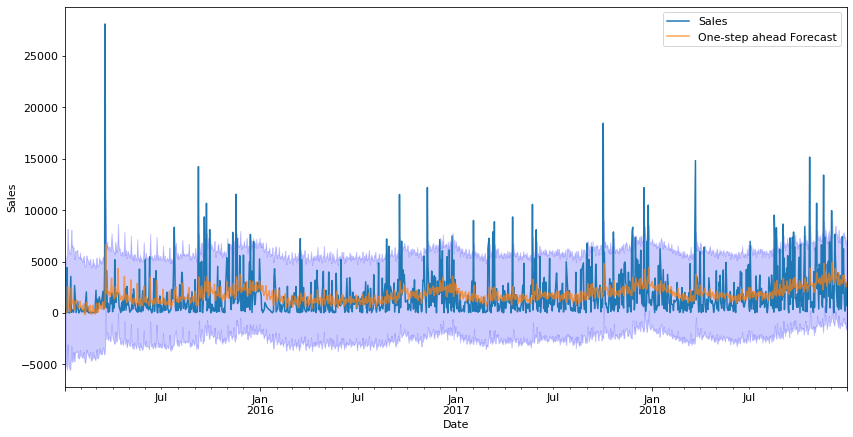

In [54]:
## create predictions
pred = results.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False)
pred_val = pred.conf_int()

## plot the original values
ax = stat_df['2015':].plot(label='observed')
## prediction plot
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='b', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [55]:
y_forecast = pred.predicted_mean
y_actual = stat_df['Sales']

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecast, y_actual)
rmse = sqrt(mse)

# root mean squared error of the forecast. rounded to 2 decimals
print(f'The Mean Squared Error of the forecasts is {round(rmse, 2)}')

The Mean Squared Error of the forecasts is 2130.24


In [57]:
# Get Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_actual - y_forecast) / y_actual)) * 100
mape

744.2796243651256

In [58]:
# 15 days of forecast Sales data from the last value of '2018-12-30' in the 'Order Date' column

forecast = results.forecast(steps=15)
print(forecast.astype('float')) #displays the sales forecast as type float

2018-12-31    2667.872280
2019-01-01    3200.266913
2019-01-02    3220.774239
2019-01-03    2796.500929
2019-01-04    2816.080403
2019-01-05    3045.837516
2019-01-06    2946.380407
2019-01-07    3008.356850
2019-01-08    3344.342459
2019-01-09    3066.914374
2019-01-10    2646.104611
2019-01-11    2980.101598
2019-01-12    2925.208068
2019-01-13    3147.781510
2019-01-14    3204.410866
Freq: D, Name: predicted_mean, dtype: float64


### SARIMA Model forecast

In [59]:
##Forecasting 15 days ahead
forecast_values = results.get_forecast(steps = 15)

##Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

##display the predicted_mean of the forecast values
forecast_values.predicted_mean

2018-12-31    2667.872280
2019-01-01    3200.266913
2019-01-02    3220.774239
2019-01-03    2796.500929
2019-01-04    2816.080403
2019-01-05    3045.837516
2019-01-06    2946.380407
2019-01-07    3008.356850
2019-01-08    3344.342459
2019-01-09    3066.914374
2019-01-10    2646.104611
2019-01-11    2980.101598
2019-01-12    2925.208068
2019-01-13    3147.781510
2019-01-14    3204.410866
Freq: D, Name: predicted_mean, dtype: float64

<Figure size 2160x1080 with 0 Axes>

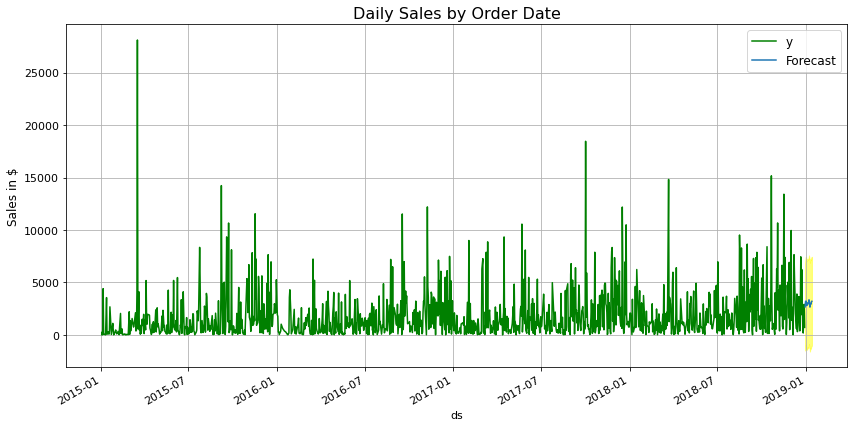

In [60]:
plt.figure(figsize=(30, 15))

#Plot the data
ax = pred_df.plot(x='ds', y='y', legend = True, color='green')
#ax = stat_df.plot(x=stat_df.index, y='Sales', legend = True, color='red')

#Plot the forecasted values 
forecast_values.predicted_mean.plot(ax=ax, label='Forecast', grid=True)

#Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color='yellow', alpha = .5)

plt.title('Daily Sales by Order Date', size = 16)
plt.ylabel('Sales in $', size=12)
plt.legend(loc='upper right', prop={'size': 12})
ax.axes.get_xaxis().set_visible(True)

plt.show()

## =========================================================================

## LSTM predictions

https://www.kaggle.com/ohseokkim/predicting-future-by-lstm-prophet-neural-prophet

In [61]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

#import torch
#from torch import nn
#import torch.nn.functional as F

In [62]:
# Segregating the Sales column for scaling
LSTM_sales = stat_df.filter(['Sales'])

# Conversion to numpy array
dataset = LSTM_sales.values

#the number of rows to train the model
train_data_len = int(np.ceil(len(dataset) * 0.85))

print(f'train_data_len: {train_data_len}')

train_data_len: 1240


In [63]:
# Create the scaler instance. Using range 0 to 1, since the Sales values will always be 0 or above (positive values)
scaler = MinMaxScaler(feature_range=(0,1))

# Fit the scaler created above on the dataset
scaled_data = scaler.fit_transform(dataset)      ## fit_transform expects 2D array

print(f'scaled_data_len: {len(scaled_data)}')

# Display initial few records from the scaled data array
scaled_data[:10]

scaled_data_len: 1458


array([[0.00051344],
       [0.01017765],
       [0.00062338],
       [0.15673814],
       [0.00302939],
       [0.00219999],
       [0.00137059],
       [0.00187904],
       [0.0002818 ],
       [0.06332924]])

In [64]:
# Scaled training dataset creation
train_data = scaled_data[0:int(train_data_len), :]
print(f'train_data length: {len(train_data)}, shape of train_data: {train_data.shape}')

train_data length: 1240, shape of train_data: (1240, 1)


In [65]:
# Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    #if i <= 61:                         ## initial few records to ensure data populating okay
    #    print(x_train)
    #    print(y_train)
        
#Convert x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

len(x_train), len(y_train)

(1180, 1180)

In [66]:
## Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

## Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## Train the model
model.fit(x_train, y_train, batch_size=20, epochs=3)


## model summary
model.summary()

Epoch 1/3
59/59 [==============================] - 5s 90ms/step - loss: 0.0059
Epoch 2/3
59/59 [==============================] - 5s 89ms/step - loss: 0.0057
Epoch 3/3
59/59 [==============================] - 5s 88ms/step - loss: 0.0056
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Create test data set
test_data = scaled_data[train_data_len - 60 : , : ]

print(len(test_data))

278


In [68]:
# Create x_test and y_test
x_test = []
y_test = dataset[train_data_len  :, : ]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60 : i, 0])

# Convert x_test to numpy array
x_test = np.array(x_test)

print('x_test array: ', len(x_test))
print('y_test array: ', len(y_test))

## reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_test array:  218
y_test array:  218


In [69]:
## predicted values from the model

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [70]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2610.5202661853996

In [71]:
# Get Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mape

601.5801510265312

In [72]:
pred_df.head()

ds        y
0 2015-01-03    16.45
1 2015-01-04   288.06
2 2015-01-05    19.54
3 2015-01-06  4407.10
4 2015-01-07    87.16

In [73]:
plot_pred_df = pred_df

plot_pred_df.drop(columns=['ds'], inplace=True)

plot_pred_df.head()

y
0    16.45
1   288.06
2    19.54
3  4407.10
4    87.16

In [74]:
# Plot the data
pd.options.mode.chained_assignment = None
train = LSTM_sales[:train_data_len]
valid = LSTM_sales[train_data_len:]
valid['Predictions'] = predictions.flatten()
print(f'train_len: {len(train)} , valid_len: {len(valid)}')

train_len: 1240 , valid_len: 218


In [75]:
train.head()

Sales
Order Date         
2015-01-03    16.45
2015-01-04   288.06
2015-01-05    19.54
2015-01-06  4407.10
2015-01-07    87.16

In [76]:
valid.tail()

Sales  Predictions
Order Date                      
2018-12-26   814.59  2016.308960
2018-12-27   177.64  1937.691772
2018-12-28  1657.34  1798.380981
2018-12-29  2915.54  1706.359375
2018-12-30   713.79  1690.921509

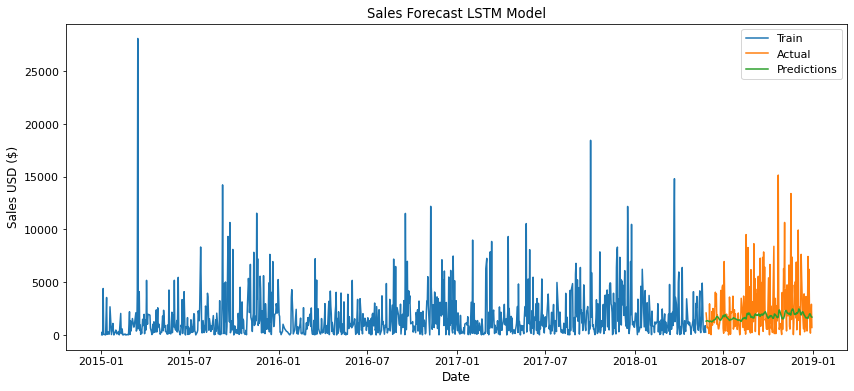

In [77]:
plt.figure(figsize=(14, 6))
plt.title('Sales Forecast LSTM Model')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales USD ($)', fontsize=12)
plt.plot(train['Sales'])
plt.plot(valid[['Sales', 'Predictions']])

plt.legend(['Train', 'Actual', 'Predictions' ], loc='upper right')
plt.show()